Статья: {'Gautama Buddha'}
Статья: {'Buddhist meditation'}
Статья: {'Pali Canon'}
Статья: {'Edicts of Ashoka'}
Статья: {'Ananda'}
Статья: {'Buddhist texts'}
Статья: {'Buddhavaṃsa'}
Статья: {'Dharmaguptaka'}
Статья: {'Noble Eightfold Path'}
Статья: {'Theravada'}
Статья: {'Buddhahood'}
Статья: {'Parinirvana'}
Статья: {'dukkha'}
Статья: {'Vajrayana'}
Статья: {'Moksha'}
Статья: {'forestry'}
Статья: {'herbs'}
Статья: {'Plant Physiology'}
Статья: {'biochemistry'}
Статья: {'organelles'}
Статья: {'photosynthesis'}
Статья: {'Plant hormone'}
Статья: {'chloroplasts'}
Статья: {'plant taxonomy'}
Статья: {'biology'}
Статья: {'Sporopollenin'}
Статья: {'rapeseed'}
Статья: {'floras'}
Статья: {'biodiversity'}
Статья: {'pollinate'}
Статья: {'Modes of transport'}
Статья: {'people movers'}
Статья: {'private transport'}
Статья: {'rapid transit'}
Статья: {'sleds'}
Статья: {'human-powered aircraft'}
Статья: {'bus stations'}
Статья: {'Train'}
Статья: {'Road transport'}
Статья: {'short sea shipping'}
Статья: {'

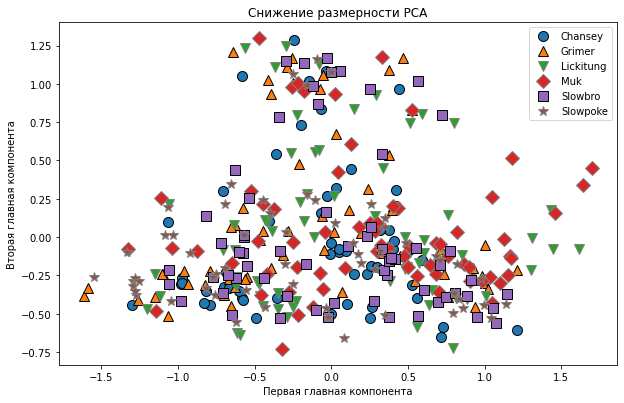

Размер матрицы фичей до (381, 532)
Размер матрицы фичей после tSNE (381, 2)


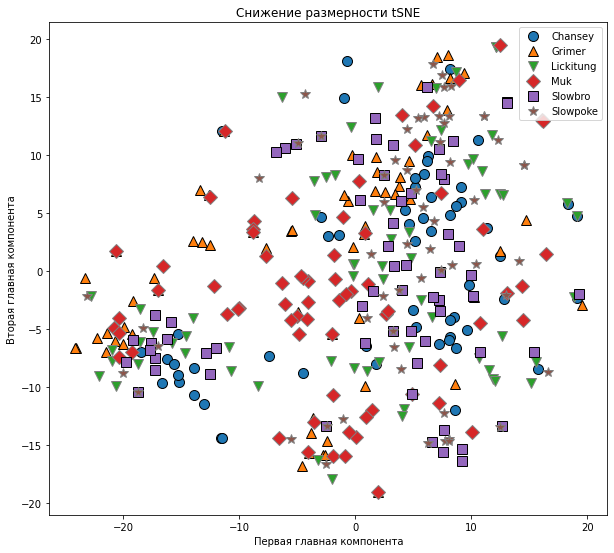

Размер матрицы фичей до (45, 18440)
Размер матрицы фичей после PCA (45, 2)


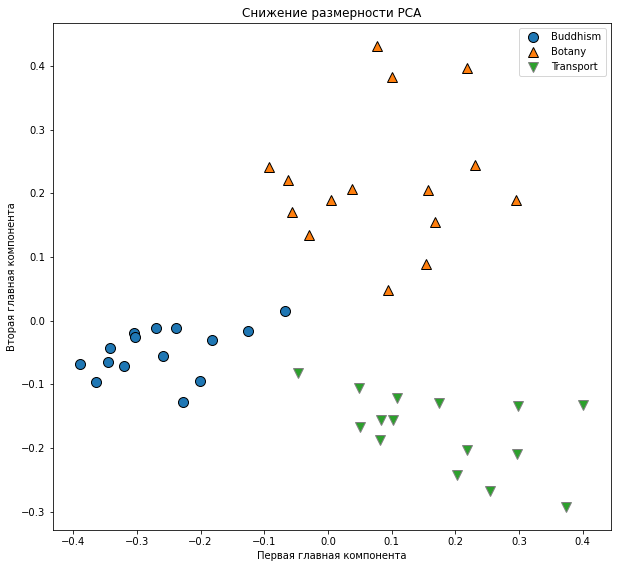

Размер матрицы фичей до (45, 18440)
Размер матрицы фичей после tSNE (45, 2)


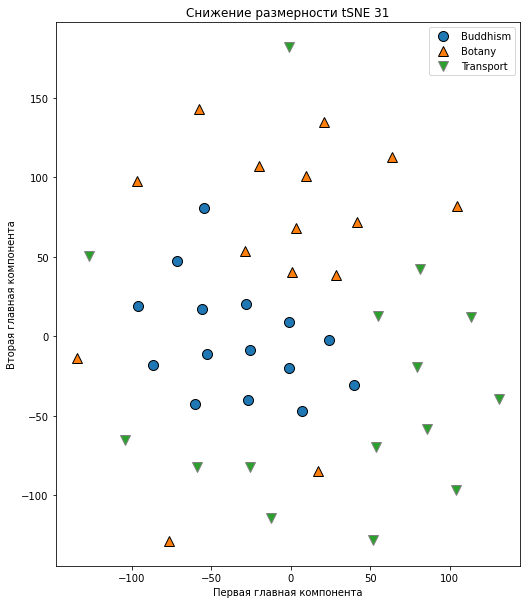

In [8]:
import h5py
import numpy as np
import mglearn as mglearn
import matplotlib.pyplot as plt
import random
import pandas as pd
import wikipedia
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import csr_matrix

artic_list = []
title = []
articles = [
    # Buddhism
    'Gautama Buddha', 'Buddhist meditation', 'Pali Canon', 'Edicts of Ashoka', 'Ananda',
    'Buddhist texts', 'Buddhavaṃsa', 'Dharmaguptaka', 'Noble Eightfold Path', 'Theravada',
    'Buddhahood', 'Parinirvana', 'dukkha', 'Vajrayana', 'Moksha',
    # Botany
    'forestry', 'herbs', 'Plant Physiology', 'biochemistry', 'organelles',
    'photosynthesis', 'Plant hormone', 'chloroplasts', 'plant taxonomy', 'biology',
    'Sporopollenin', 'rapeseed', 'floras', 'biodiversity', 'pollinate',
    # Transport
    'Modes of transport', 'people movers', 'private transport', 'rapid transit', 'sleds',
    'human-powered aircraft', 'bus stations', 'Train', 'Road transport', 'short sea shipping',
    'aerial tramways', 'bulk transport', 'Ship transport', 'jet engine', 'passenger']

for article in articles:
    print(f'Статья:', {article})
    artic_list.append(wikipedia.page(title=article, auto_suggest=False).content)
    title.append(article)

vectorizer = TfidfVectorizer(stop_words={'english'})
x = vectorizer.fit_transform(artic_list)
list_articles = []
for i in range(1,4):
    for j in range(1, 16):
        list_articles.append(i)
target = LabelEncoder().fit_transform(list_articles)
df = pd.DataFrame(data=csr_matrix.todense(x))
a = np.array(df.values)

with h5py.File('articles_features', 'w') as h5f_data:
    h5f_data.create_dataset('dataset_2', data=a)
with h5py.File('articles_themes', 'w') as h5f_label:
    h5f_label.create_dataset('dataset_2', data=np.array(target))
print('thats all')


pca_components = 2
_pokemon_names = ['Chansey', 'Grimer', 'Lickitung', 'Muk', 'Slowbro', 'Slowpoke']
_articles_theme = ['Buddhism', 'Botany', 'Transport']


def features_(values_filename, labels_filename, name_dataset):
    out = []
    with h5py.File(values_filename, 'r') as h5f_data:
        features_string = h5f_data[name_dataset]
        features = np.array(features_string)
        out.append(features)
    with h5py.File(labels_filename, 'r') as h5f_label:
        labels_string = h5f_label[name_dataset]
        labels = np.array(labels_string)
        out.append(labels)
    return out

def tsne_(data, random_state):
    tsne = TSNE(random_state=random_state)
    data_tsne = tsne.fit_transform(data)
    print(f'Размер матрицы фичей до {data.shape}')
    print(f'Размер матрицы фичей после tSNE {data_tsne.shape}')
    return data_tsne

def pca_(data):
    pca = PCA(n_components=pca_components)
    pca.fit(data)
    pca_data = pca.transform(data)
    print(f'Размер матрицы фичей до {data.shape}')
    print(f'Размер матрицы фичей после PCA {pca_data.shape}')
    return pca_data

def plot_graphs(data, class_, legent_list, title=None):
    plt.figure(figsize=(10, 10))
    mglearn.discrete_scatter(data[:, 0], data[:, 1], class_)
    plt.legend(legent_list)
    plt.gca().set_aspect("equal")
    plt.xlabel("Первая главная компонента")
    plt.ylabel("Вторая главная компонента")
    plt.title(title)
    plt.show()


if __name__ == '__main__':
    pokemon_features, pokemon_labels = features_('feature_values', 'pokemon_names', 'dataset_1')
    
    pca_data = pca_(pokemon_features)
    plot_graphs(pca_data, pokemon_labels, _pokemon_names, 'Снижение размерности PCA')
    
    tsne_data = tsne_(pokemon_features, 3)
    plot_graphs(tsne_data, pokemon_labels, _pokemon_names, 'Снижение размерности tSNE')
    
    articles_features, articles_labels = features_('articles_features', 'articles_themes', 'dataset_2')
    
    pca_data = pca_(articles_features)
    plot_graphs(pca_data, articles_labels, _articles_theme, 'Снижение размерности PCA')
    
    tsne_data = tsne_(articles_features, r)
    plot_graphs(tsne_data, articles_labels, _articles_theme, f'Снижение размерности tSNE {r}')
